Mounted at /drive
   _id  LOC_ID                                           LOC_NAME  \
0    1    1013              Lakeshore Community Child Care Centre   
1    2    1014            Alternative Primary School Parent Group   
2    3    1015     Cardinal Leger Child Care Centre (Scarborough)   
3    4    1016  George Brown - Richmond Adelaide Childcare Centre   
4    5    1017  Woodland Nursery School (Warden Woods Communit...   

             AUSPICE            ADDRESS    PCODE  ward  \
0  Non Profit Agency     101 SEVENTH ST  M8V 3B5     3   
1  Non Profit Agency    1100 SPADINA RD  M5N 2M6     8   
2  Non Profit Agency     600 MORRISH RD  M1C 4Y1    25   
3  Non Profit Agency  130 ADELAIDE ST W  M5H 3P5    10   
4  Non Profit Agency    1 FIRVALLEY CRT  M1L 1N8    20   

                    bldg_type                         BLDGNAME  IGSPACE  \
0    Public Elementary School     Seventh Street Public School        0   
1    Public Elementary School  North Preparatory Public School      

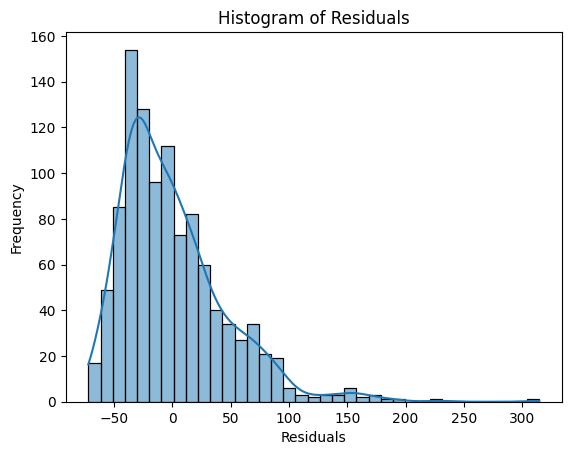

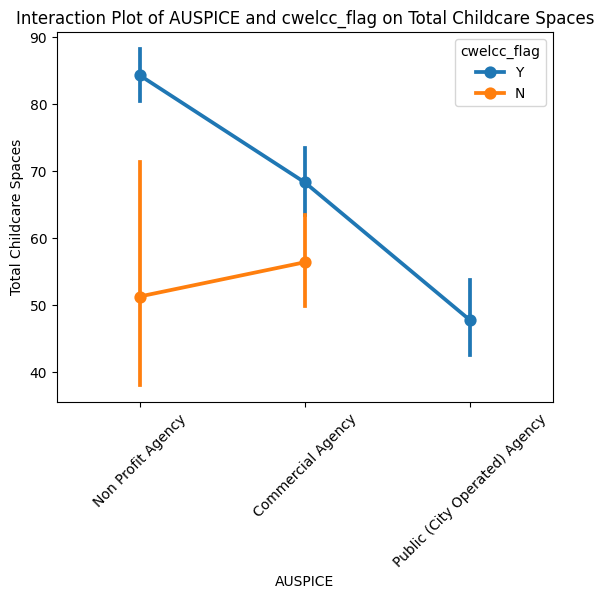

In [2]:
# Rosa Lee
# INF2178: Assignment 2

# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Importing data frame from Google Drive
from google.colab import drive
drive.mount("/drive", force_remount=True)

# Importing data into variable data
data = pd.read_excel('/drive/MyDrive/INF2178_A2_data.xlsx')

# Printing the first five rows of the data
print(data.head())

# Identifying the data types and missing values
print(data.info())

# Perform quantitative analysis using one-way and two-way ANOVAs
# One-way ANOVA, comparing the capacity across different auspices
one_way_anova_model = ols('TOTSPACE ~ C(AUSPICE)', data=data).fit()
one_way_anova_table = sm.stats.anova_lm(one_way_anova_model, typ=2)
print("One-Way ANOVA Table:")
print(one_way_anova_table)

# Post-hoc test using Tukey's HSD
tukey_results = sm.stats.multicomp.pairwise_tukeyhsd(data['TOTSPACE'], data['AUSPICE'])
print("\nTukey's HSD Summary:")
print(tukey_results.summary())

# Two-Way ANOVA with 'AUSPICE' and 'subsidy' as the independent variables and 'TOTSPACE' as the dependent variable
two_way_anova_model = ols('TOTSPACE ~ C(AUSPICE) * C(subsidy)', data=data).fit()
anova_table_2way = sm.stats.anova_lm(two_way_anova_model, typ=2)
print("Two-Way ANOVA Table:")
print(anova_table_2way)

# Checking the model diagnostics
residuals = two_way_anova_model.resid
# Assumption 1: Residuals are normally distributed
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plotting interaction plot
sns.pointplot(data=data, x='AUSPICE', y='TOTSPACE', hue='cwelcc_flag')
plt.title('Interaction Plot of AUSPICE and cwelcc_flag on Total Childcare Spaces')
plt.xlabel('AUSPICE')
plt.ylabel('Total Childcare Spaces')
plt.xticks(rotation=45)
plt.show()
